In [1]:
import numpy as np
import pandas as pd
import os

project_path = os.path.abspath(os.getcwd())
project_path = project_path.rsplit('\\',1)[0]
data_path = project_path + "\\data\\"

In [2]:
os.chdir(data_path)
big1 = pd.read_csv("2024-01-16_big_entropy_58-125.csv")
big2 = pd.read_csv("2024-01-16_big_entropy_126-162.csv")
big3 = pd.read_csv("2024-01-16_big_entropy_163-441.csv")
vir  = pd.read_csv("2024-01-17_vir_entropy.csv")

df = pd.concat([big1, big2, big3, vir], axis=0)
df.to_csv("2024-01-17_merged_dataset_for_analysis.csv", index=False)

## Add Questionnaire data

In [3]:
os.chdir(data_path)
df = pd.read_csv("2024-01-17_merged_dataset_for_analysis.csv")
df.head()

,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy
0,big,58,H,0,0.621967,1.500765
1,big,58,H,10,0.702212,1.945393
2,big,58,H,20,0.723979,1.693195
3,big,58,H,30,0.715605,1.736529
4,big,58,H,40,0.760355,1.684254


In [4]:
os.chdir(r'V:\Big-Fish_VR_Classroom\data\self_reports_questionnaire')
         
bigQ = pd.read_csv("2020_12_14_self-reports_all_items_LH.csv")
bigQ.columns

Index(['ID', 'schule', 'klasse', 'beding', 'sitzp', 'darst', 'meldeant', 'd1',
       'd2', 'd3',
       ...
       'sksi2b_mean', 'sksi_mean', 'skct_mean', 'prae_mean', 'real_mean',
       'int_mean', 'anf1_mean', 'anf2_mean', 'anf_mean', 'mc2_mean'],
      dtype='object', length=120)

In [11]:
big_exp = bigQ[['ID', 'ctve03']]
big_exp['Dataset'] = 'big'
big_exp = big_exp[big_exp['ctve03'].isin([0,1,2])]
big_exp = big_exp.rename(columns={'ctve03':'VR_exp'})
big_exp['VR_exp'] = np.where(big_exp['VR_exp']>0, 1, 0)
big_exp['VR_exp'].value_counts()

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_7988\3510220158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_exp['Dataset'] = 'big'


VR_exp
1    206
0    142
Name: count, dtype: int64

In [12]:
os.chdir(r'V:\VirATeC\data\questionnaire')
virQ = pd.read_csv('pre_post.csv', sep=";", index_col=False, decimal=',', encoding='ISO-8859-1')
vir_exp = virQ[['ID', 'vrexp02']]
vir_exp['Dataset'] = 'vir'
vir_exp = vir_exp[vir_exp['vrexp02'].isin([1,2, 3, 4])]
vir_exp = vir_exp.rename(columns={'vrexp02':'VR_exp'})
vir_exp['VR_exp'] = vir_exp['VR_exp']-1
vir_exp['VR_exp'] = np.where(vir_exp['VR_exp']>0, 1, 0)
vir_exp['VR_exp'].value_counts()

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_7988\4019325937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vir_exp['Dataset'] = 'vir'


VR_exp
0    22
1    19
Name: count, dtype: int64

In [13]:
df_exp = pd.concat([big_exp, vir_exp], axis=0)
df_exp

,ID,VR_exp,Dataset
0,58,0,big
1,59,0,big
2,60,1,big
3,61,1,big
4,62,0,big
...,...,...,...
37,38,1,vir
38,39,0,vir
39,40,0,vir
40,41,1,vir


In [14]:
df['ID'] = df['ID'].astype(int)
df = df.drop(columns=['VR_exp'])
df = df.merge(df_exp, on=['Dataset', 'ID'], how='left')
df

,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,VR_exp
0,big,58,H,0,0.621967,1.500765,0.0
1,big,58,H,10,0.702212,1.945393,0.0
2,big,58,H,20,0.723979,1.693195,0.0
3,big,58,H,30,0.715605,1.736529,0.0
4,big,58,H,40,0.760355,1.684254,0.0
...,...,...,...,...,...,...,...
26075,vir,42,1,550,0.567338,1.825746,0.0
26076,vir,42,1,560,0.358690,2.031449,0.0
26077,vir,42,1,570,0.325738,2.117798,0.0
26078,vir,42,1,580,0.349106,1.827593,0.0


In [50]:
dfd = df.drop(columns=['Condition'])
dfd['transition_entropy'] = dfd['transition_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfd['stationary_entropy'] = dfd['stationary_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfdbig = dfd[np.logical_and(dfd['Dataset']=='big', dfd['Start']<800)]
dfdvir = dfd[np.logical_and(dfd['Dataset']=='vir', dfd['Start']<550)]
dfd = pd.concat([dfdbig, dfdvir], axis=0)
df_agg = dfd.groupby(['Dataset', 'ID']).mean().reset_index().drop(columns=['Start']) 

In [51]:
df_agg.groupby('VR_exp')[['transition_entropy', 'stationary_entropy']].describe()

transition_entropy                                                    
                    count      mean      std       min       25%       50%   
VR_exp                                                                       
0.0                 135.0  0.601131  0.19963  0.280764  0.455449  0.567540  \
1.0                 172.0  0.545892  0.17656  0.189755  0.417604  0.516987   

                           stationary_entropy                                 
             75%       max              count      mean       std       min   
VR_exp                                                                        
0.0     0.714332  1.131960              135.0  1.107450  0.414902  0.552995  \
1.0     0.667955  0.975299              172.0  1.041154  0.318165  0.531918   

                                                
             25%       50%       75%       max  
VR_exp                                          
0.0     0.824864  1.004002  1.209204  2.342668  
1.0     0.804172  0.991705  1.209933  2.062232

C:\Users\HIBVR\jupyter_venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [52]:
from pingouin import ttest
df0 = df_agg[df_agg['VR_exp']==0]
df1 = df_agg[df_agg['VR_exp']==1]
ttest(df0['transition_entropy'], df1['transition_entropy'], paired=False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.531,269.458,two-sided,0.012,"[0.01, 0.1]",0.295,2.639,0.726


In [53]:
ttest(df0['stationary_entropy'], df1['stationary_entropy'], paired=False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.536,245.293,two-sided,0.126,"[-0.02, 0.15]",0.182,0.39,0.352


In [25]:
os.chdir(data_path)
df_agg.to_csv('2024-01-17_aggregated_dataset_for_analysis.csv', index=False)

## Aggregated Analysis

In [54]:
df_aggbig = df_agg[df_agg['Dataset']=='big']

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.ols(formula='transition_entropy ~ C(VR_exp)', data=df_aggbig)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:     transition_entropy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.567
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.212
Time:                        13:39:53   Log-Likelihood:                 134.61
No. Observations:                 270   AIC:                            -265.2
Df Residuals:                     268   BIC:                            -258.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5392      0.014  

## Vizualisation

In [56]:
df_big = df[df['Dataset']=='big']
df_vir = df[df['Dataset']=='vir']

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_variables(df, var, datasets):
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(12,6)})
    sns.set_theme(style="darkgrid")
    y = df[var]
    plt.title(var)
    

    ax = sns.lineplot(x="Start", y=y,
             hue="VR_exp",
             data=df,style='VR_exp', markers=["o", "o"])
    if datasets=='vir':
        ax.set_xticks(np.arange(0,550, 50)) 
    if datasets=='big':
        ax.set_xticks(np.arange(0,800, 50)) 
    ax.legend()

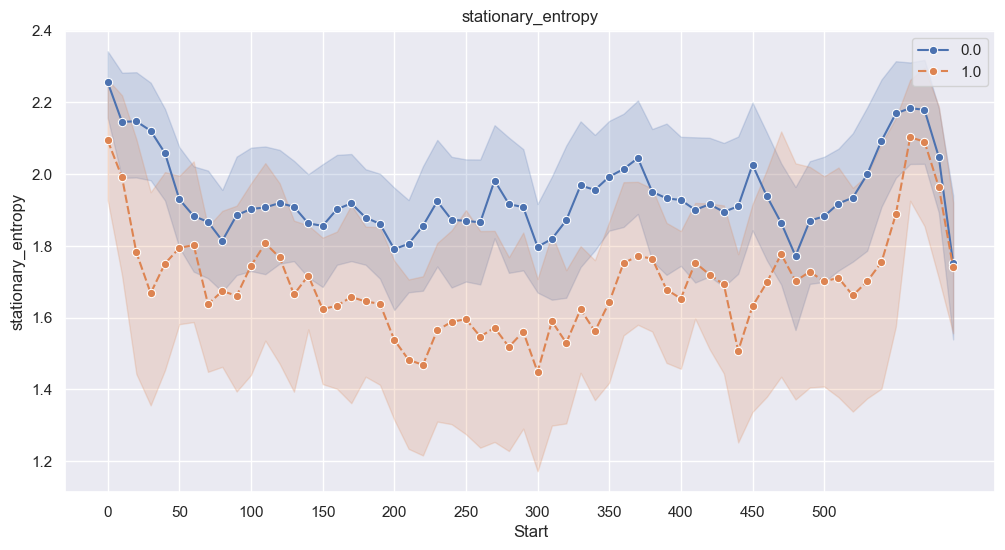

In [108]:
plot_variables(df_vir, 'stationary_entropy', 'vir')

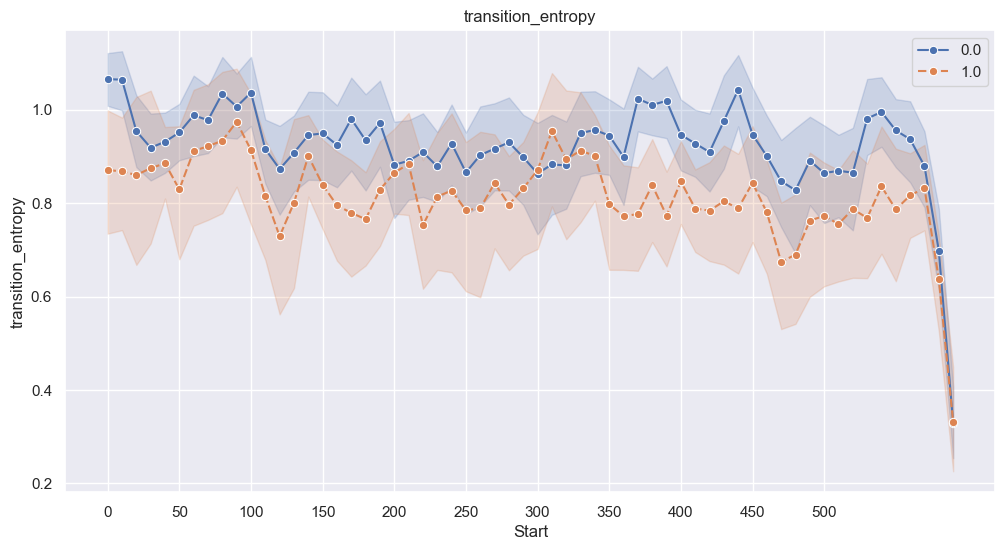

In [109]:
plot_variables(df_vir, 'transition_entropy', 'vir')

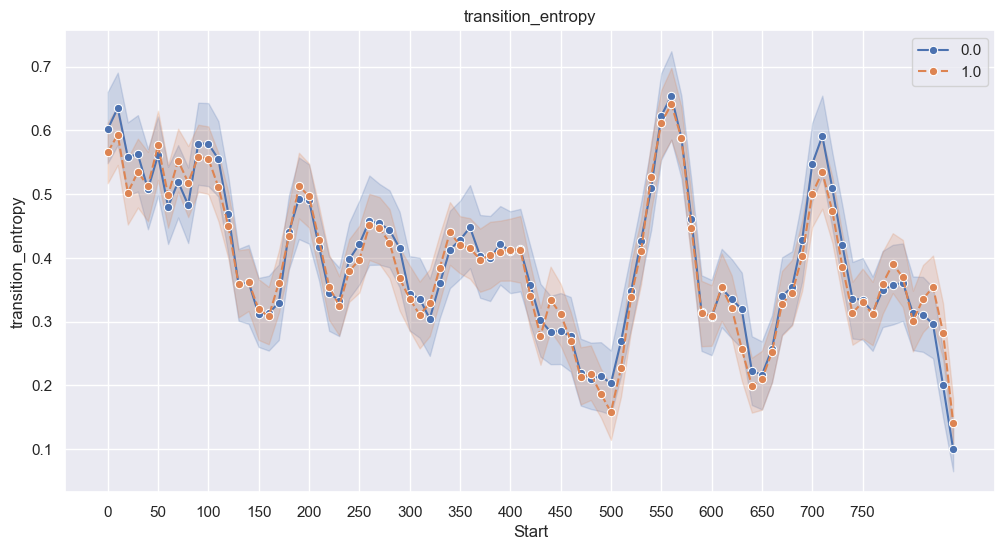

In [110]:
plot_variables(df_big, 'transition_entropy', 'big')

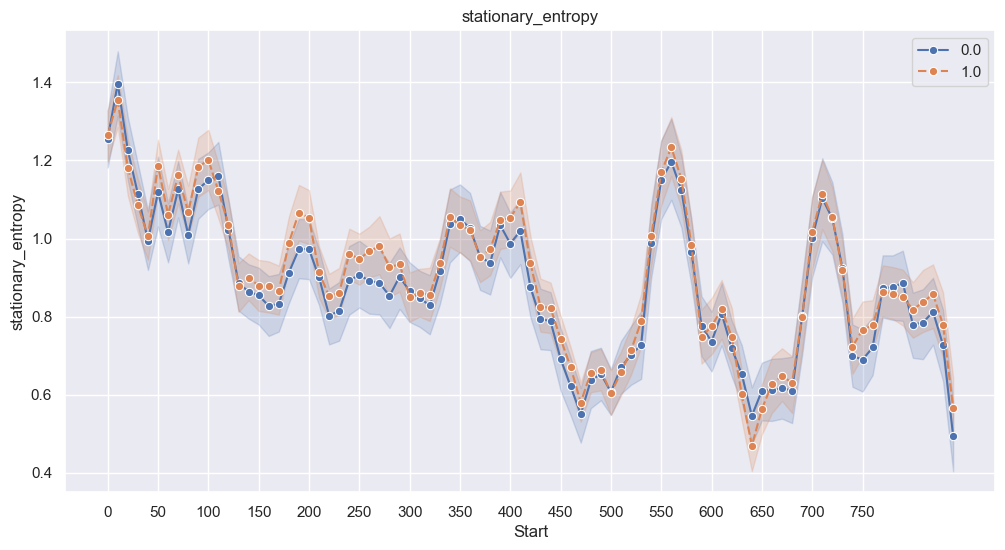

In [111]:
plot_variables(df_big, 'stationary_entropy', 'big')

## Immersion

In [82]:
prae = bigQ.columns[bigQ.columns.str.startswith("prae")]
prae

Index(['prae01', 'prae02', 'prae03', 'prae04', 'prae05', 'prae06', 'prae07',
       'prae08', 'prae09r', 'prae_mean'],
      dtype='object')

In [88]:
big_prae = bigQ[['ID', 'prae_mean']]
big_prae['Dataset'] = 'big'
big_prae['prae_mean'].describe()

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_7988\4118249604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_prae['Dataset'] = 'big'


count    353.000000
mean       2.914542
std        0.552209
min        1.111111
25%        2.555556
50%        2.888889
75%        3.333333
max        4.000000
Name: prae_mean, dtype: float64

In [89]:
df_praebig = df_big.merge(big_prae, on=['Dataset', 'ID'], how='left')
dfd = df_praebig.drop(columns=['Condition'])
dfd['transition_entropy'] = dfd['transition_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfd['stationary_entropy'] = dfd['stationary_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfdbig = dfd[np.logical_and(dfd['Dataset']=='big', dfd['Start']<800)]
df_agg_big = dfdbig.groupby(['Dataset', 'ID']).mean().reset_index().drop(columns=['Start']) 
df_agg_big

,Dataset,ID,transition_entropy,stationary_entropy,VR_exp,prae_mean
0,big,58,0.721279,1.213907,0.0,3.000000
1,big,59,0.594756,0.946216,0.0,3.111111
2,big,60,0.537505,0.957846,1.0,3.444444
3,big,61,0.830082,1.346600,1.0,2.888889
4,big,62,0.627442,1.377986,0.0,3.000000
...,...,...,...,...,...,...
275,big,433,0.623386,0.540504,1.0,3.333333
276,big,435,0.362951,0.838695,1.0,2.666667
277,big,438,0.659309,1.304886,NaN,NaN
278,big,439,0.422603,0.761539,1.0,3.555556


In [92]:
mod = smf.ols(formula='prae_mean ~ stationary_entropy ', data=df_agg_big)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              prae_mean   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.811
Date:                Wed, 17 Jan 2024   Prob (F-statistic):            0.00556
Time:                        13:59:00   Log-Likelihood:                -219.15
No. Observations:                 274   AIC:                             442.3
Df Residuals:                     272   BIC:                             449.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.3145      0

In [68]:

big_comp = bigQ[['ID', 'ctve02']]
big_comp['Dataset'] = 'big'
big_comp = big_comp[big_comp['ctve02'].isin([0,1,2])]
big_comp = big_comp.rename(columns={'ctve02':'Comp_exp'})
big_comp['Comp_exp'] = np.where(big_comp['Comp_exp']>0, 1, 0)
big_comp['Comp_exp'].value_counts()

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_7988\3878861130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_comp['Dataset'] = 'big'


Comp_exp
1    288
0     58
Name: count, dtype: int64

In [73]:
df_compbig = df_big.merge(big_comp, on=['Dataset', 'ID'], how='left')
dfd = df_compbig.drop(columns=['Condition'])
dfd['transition_entropy'] = dfd['transition_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfd['stationary_entropy'] = dfd['stationary_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfdbig = dfd[np.logical_and(dfd['Dataset']=='big', dfd['Start']<800)]
dfdvir = dfd[np.logical_and(dfd['Dataset']=='vir', dfd['Start']<550)]
dfd = pd.concat([dfdbig, dfdvir], axis=0)
df_agg_big = dfd.groupby(['Dataset', 'ID']).mean().reset_index().drop(columns=['Start']) 
df_agg_big

,Dataset,ID,transition_entropy,stationary_entropy,VR_exp,Comp_exp
0,big,58,0.721279,1.213907,0.0,1.0
1,big,59,0.594756,0.946216,0.0,0.0
2,big,60,0.537505,0.957846,1.0,1.0
3,big,61,0.830082,1.346600,1.0,1.0
4,big,62,0.627442,1.377986,0.0,0.0
...,...,...,...,...,...,...
275,big,433,0.623386,0.540504,1.0,1.0
276,big,435,0.362951,0.838695,1.0,1.0
277,big,438,0.659309,1.304886,NaN,NaN
278,big,439,0.422603,0.761539,1.0,1.0


In [74]:
mod = smf.ols(formula='transition_entropy ~ C(Comp_exp)', data=df_agg_big)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     transition_entropy   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.440
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.231
Time:                        13:49:14   Log-Likelihood:                 132.57
No. Observations:                 268   AIC:                            -261.1
Df Residuals:                     266   BIC:                            -254.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5506      0

In [75]:
mod = smf.ols(formula='stationary_entropy ~ C(Comp_exp)', data=df_agg_big)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     stationary_entropy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.109
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.293
Time:                        13:49:24   Log-Likelihood:                 26.445
No. Observations:                 268   AIC:                            -48.89
Df Residuals:                     266   BIC:                            -41.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0001      0

In [76]:
df_agg_big.groupby('Comp_exp')['stationary_entropy'].describe()

,count,mean,std,min,25%,50%,75%,max
Comp_exp,,,,,,,,
0.0,45.0,1.000086,0.247472,0.610222,0.778853,0.960984,1.250999,1.515766
1.0,223.0,0.962220,0.214207,0.531918,0.797783,0.959875,1.131904,1.426332


In [77]:
def plot_variables_c(df, var, VR_exp):
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(12,6)})
    sns.set_theme(style="darkgrid")
    y = df[var]
    plt.title(var)
    
    if VR_exp:
        ax = sns.lineplot(x="Start", y=y,
                 hue="Comp_exp",
                 data=df,style='Comp_exp', markers=["o", "o"])
    
    ax.legend()

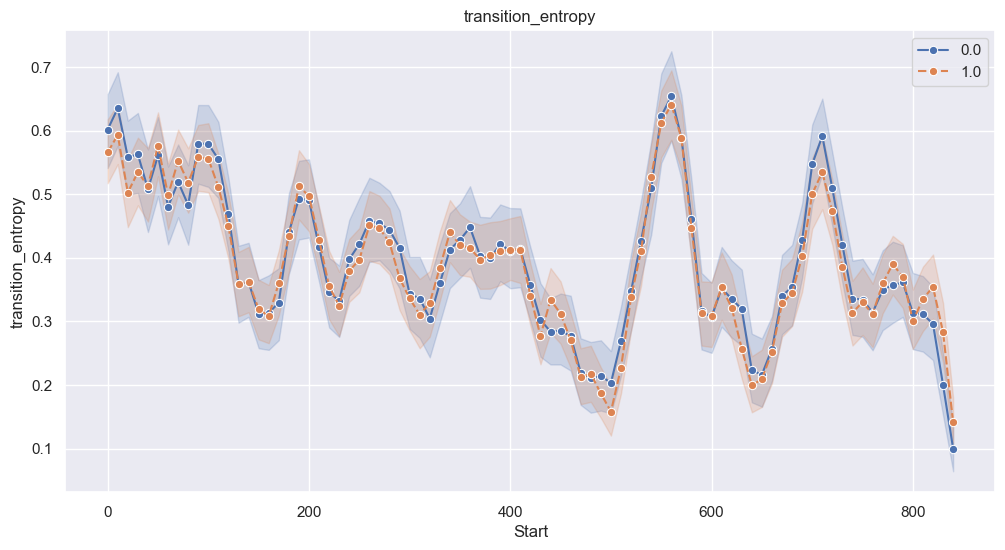

In [79]:
plot_variables(df_compbig, 'transition_entropy', True)

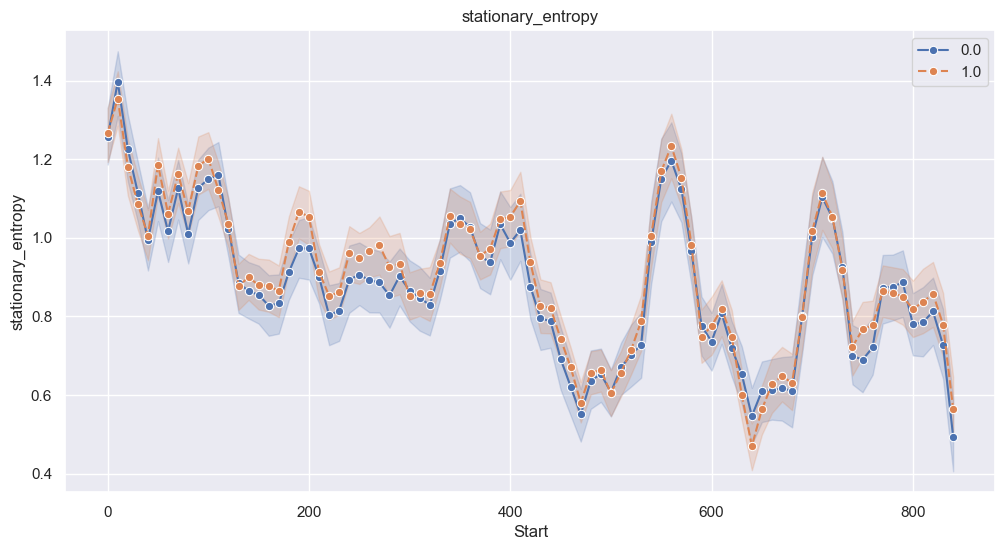

In [141]:
plot_variables(df_compbig, 'stationary_entropy', True)

In [117]:
os.chdir(r'C:\Users\HIBVR\Documents\Philipp_Stark\Entropy_Analysis\data\questionnaire')
dfs = pd.read_csv('big_szenarios.csv', sep=";", decimal=',')
dfs.columns = ['Start', 'End','event','name']
dfs

,Start,End,event,name
0,48.60,58.60,question + hand-raising,qa1_1
1,58.61,68.61,answer + teacher reaction,qa1_2
2,68.62,78.62,question + hand-raising,qa2_1
3,78.63,88.63,answer + teacher reaction,qa2_2
4,88.64,98.64,question + hand-raising,qa3_1
...,...,...,...,...
74,800.80,810.80,teacher explanation,te48
75,810.90,820.90,teacher explanation,te49
76,821.00,831.00,teacher explanation,te50
77,831.10,841.90,teacher explanation,te51


In [119]:
dfs['event'].value_counts()

event
teacher explanation                  47
question + hand-raising               8
answer + teacher reaction             4
question + hand-raising + answer      3
hand-raising + answer                 2
2x question + hand-raising            2
hand-raising + solution               2
teacher explanation + nodding         2
answer + question + hand-raising      1
reading + teacher explanation         1
teacher explanation + question        1
hand-raising + reaction               1
question + hand-raising + reading     1
question                              1
question + nodding                    1
Name: count, dtype: int64

In [123]:
dfs['event_agg'] = np.where(dfs['event'].isin(['teacher explanation', 'teacher explanation + nodding', 'reading + teacher explanation', 'teacher explanation + question']), 0, 1)
dfs

,Start,End,event,name,event_agg
0,48.60,58.60,question + hand-raising,qa1_1,1
1,58.61,68.61,answer + teacher reaction,qa1_2,1
2,68.62,78.62,question + hand-raising,qa2_1,1
3,78.63,88.63,answer + teacher reaction,qa2_2,1
4,88.64,98.64,question + hand-raising,qa3_1,1
...,...,...,...,...,...
74,800.80,810.80,teacher explanation,te48,0
75,810.90,820.90,teacher explanation,te49,0
76,821.00,831.00,teacher explanation,te50,0
77,831.10,841.90,teacher explanation,te51,0


In [129]:
dfs = dfs.rename(columns={'Start':'Start_float'})
dfs['Start'] = ((dfs['Start_float'] /10).round(0))*10
dfs['Start']

0      50.0
1      60.0
2      70.0
3      80.0
4      90.0
      ...  
74    800.0
75    810.0
76    820.0
77    830.0
78    840.0
Name: Start, Length: 79, dtype: float64

In [132]:
dfd = df.drop(columns=['Condition'])
dfd['transition_entropy'] = dfd['transition_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfd['stationary_entropy'] = dfd['stationary_entropy'].replace(0,np.nan).replace(-0.0, np.nan)
dfdbig = dfd[np.logical_and(dfd['Dataset']=='big', dfd['Start']<820)]
dfdbig_event = dfdbig.merge(dfs[['Start', 'event_agg']], on='Start', how='left')
dfdbig_event

,Dataset,ID,Start,transition_entropy,stationary_entropy,VR_exp,event_agg
0,big,58,0,0.621967,1.500765,0.0,NaN
1,big,58,10,0.702212,1.945393,0.0,NaN
2,big,58,20,0.723979,1.693195,0.0,NaN
3,big,58,30,0.715605,1.736529,0.0,NaN
4,big,58,40,0.760355,1.684254,0.0,NaN
...,...,...,...,...,...,...,...
22955,big,441,770,0.421775,1.211542,1.0,0.0
22956,big,441,780,0.387247,1.334509,1.0,0.0
22957,big,441,790,0.320110,1.421866,1.0,0.0
22958,big,441,800,0.613440,1.346640,1.0,0.0


In [133]:
dfdbig_event = dfdbig_event.dropna()
dfdbig_event

,Dataset,ID,Start,transition_entropy,stationary_entropy,VR_exp,event_agg
5,big,58,50,0.884671,1.804901,0.0,1.0
6,big,58,60,0.858018,1.696215,0.0,1.0
7,big,58,70,0.920955,1.450148,0.0,1.0
8,big,58,80,0.713856,1.444194,0.0,1.0
9,big,58,90,0.499989,1.173285,0.0,1.0
...,...,...,...,...,...,...,...
22955,big,441,770,0.421775,1.211542,1.0,0.0
22956,big,441,780,0.387247,1.334509,1.0,0.0
22957,big,441,790,0.320110,1.421866,1.0,0.0
22958,big,441,800,0.613440,1.346640,1.0,0.0


In [134]:
dfdbig_event.groupby('event_agg')[['transition_entropy', 'stationary_entropy']].describe()

transition_entropy                                           
                       count      mean       std       min       25%   
event_agg                                                              
0.0                   8035.0  0.526210  0.254362  0.002141  0.332006  \
1.0                   5706.0  0.594624  0.279593  0.010776  0.383426   

                                        stationary_entropy             
                50%       75%       max              count      mean   
event_agg                                                              
0.0        0.528044  0.698412  1.496687             8035.0  1.014556  \
1.0        0.594903  0.800388  1.393956             5706.0  1.179661   

                                                                       
                std       min       25%       50%       75%       max  
event_agg                                                              
0.0        0.345901  0.043032  0.775005  0.988227  1.227265  2.469865  
1.0        0.387218  0.035958  0.888330  1.155792  1.449841  2.556370

In [136]:
os.chdir(r'C:\Users\HIBVR\Documents\Philipp_Stark\Entropy_Analysis\data')
dfdbig_event.to_csv('2024-01-17_big_entropy_with_events.csv', index=False)

In [138]:
test = dfdbig_event[dfdbig_event['event_agg']==0]
test['transition_entropy'].describe()

count    8035.000000
mean        0.526210
std         0.254362
min         0.002141
25%         0.332006
50%         0.528044
75%         0.698412
max         1.496687
Name: transition_entropy, dtype: float64

In [139]:
test = dfdbig_event[dfdbig_event['event_agg']==1]
test['transition_entropy'].describe()

count    5706.000000
mean        0.594624
std         0.279593
min         0.010776
25%         0.383426
50%         0.594903
75%         0.800388
max         1.393956
Name: transition_entropy, dtype: float64

In [140]:
mod = smf.ols(formula='transition_entropy ~ C(event_agg)', data=dfdbig_event)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     transition_entropy   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.47e-50
Time:                        15:59:53   Log-Likelihood:                -1255.0
No. Observations:               13741   AIC:                             2514.
Df Residuals:                   13739   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5262    